<a href="https://colab.research.google.com/github/mschuessler/udemy-exercise/blob/master/Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from statistics import mean
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import graphviz
from sklearn.model_selection import validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
def plot_classifier(model, X, Z, proba = False, xlabel = None, ylabel = None):
    # https://matplotlib.org/examples/color/colormaps_reference.html
    plt.set_cmap("RdYlBu")
    
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 1000),
        np.linspace(y_min, y_max, 1000)
    )

    if proba:
        zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        plt.imshow(zz.reshape(xx.shape), 
                   origin = "lower", 
                   aspect = "auto", 
                   extent = (x_min, x_max, y_min, y_max), 
                   vmin = 0, 
                   vmax = 1, 
                   alpha = 0.25)
    else: 
        zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
        plt.contourf(xx, yy, zz.reshape(xx.shape), 
                     alpha = 0.25, 
                     vmin = 0, 
                     vmax = 1)

    plt.scatter(X[:, 0], X[:, 1], c=Z)
    
    if xlabel is not None:
        plt.xlabel(xlabel)
       
    if ylabel is not None:
        plt.ylabel(ylabel)
        
    # Damit wird die Grafik genau so groß angezeigt wie der
    # schattierte Farbbereich:
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.show()

# Lineare Regression

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/wohnungspreise.csv")
# for excel pd_read_csv(filename, sep=";")
df.head()

In [ ]:
X = df[["Quadratmeter"]].values
Y = df[["Verkaufspreis"]].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0, test_size = 0.25)

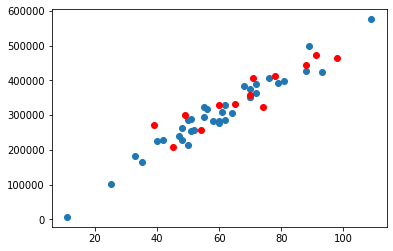

In [ ]:
plt.scatter(X_train,Y_train)
plt.scatter(X_test,Y_test, color = "red")

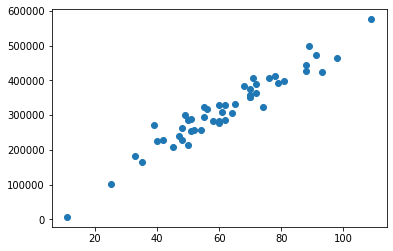

In [ ]:
plt.scatter(df["Quadratmeter"], df["Verkaufspreis"])
plt.show()

In [ ]:
model = LinearRegression()
model.fit(df[["Quadratmeter"]], df[["Verkaufspreis"]])
print("Intercept:" + str(model.intercept_))
print("Coef:" + str(model.coef_))

Intercept:[3143.28481869]
Coef:[[5071.35242619]]


array([1.71795738e+10])

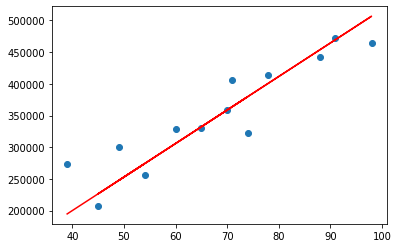

In [ ]:
splitModel = LinearRegression()
splitModel.fit(X_train,Y_train)
predicted = splitModel.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,predicted, color='red')
sum((splitModel.predict(X_test)-Y_test)**2)

Scikit learn need Dataframe instead of Series as argument (which matplotlib needs) - so we adress it with [[]]

In [ ]:
type(df[["Quadratmeter"]])

pandas.core.frame.DataFrame

In [ ]:
start = 0 #min(df["Quadratmeter"])
end = max(df["Quadratmeter"])
predicted = model.predict([[start],[end]])

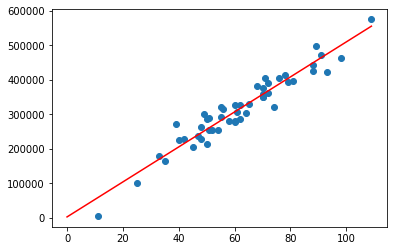

In [ ]:
plt.scatter(df["Quadratmeter"], df["Verkaufspreis"])
plt.plot([start,end],predicted,color = "red")
plt.show()

,price,yearOfRegistration,powerPS,kilometer,model,fuelType,name
0,1450,1997,75,90000,andere,benzin,Toyota_Toyota_Starlet_1._Hand__TÜV_neu
1,13100,2005,280,5000,golf,benzin,R32_tauschen_oder_kaufen
2,4500,2008,87,90000,yaris,benzin,Toyota_Yaris_1.3_VVT_i
3,6000,2009,177,125000,3er,diesel,320_Alpinweiss_Kohlenstoff
4,3990,1999,118,90000,3er,benzin,BMW_318i_E46_+++_1._Hand_+++_Liebhaberfahrzeug
...,...,...,...,...,...,...,...
245,23400,2014,160,40000,kaefer,benzin,Volkswagen_1.4_TSI_DSG_R_Line
246,9000,2014,67,20000,i_reihe,benzin,Hyundai_i10_1.0_Fifa_World_Cup_Edition
247,5500,2009,109,125000,ceed,benzin,Kia_Ceed_1.4_/_TÜV_Neu
248,1600,2002,75,125000,clio,benzin,Renault_Clio_1.2_16V


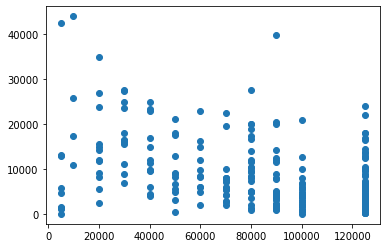

In [ ]:
cars = pd.read_csv("drive/MyDrive/Udemy/autos_prepared.csv")
plt.scatter(cars["kilometer"],cars["price"])
cars

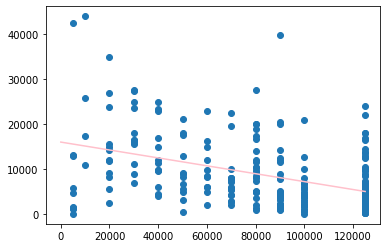

In [ ]:
carmodel = LinearRegression()
carmodel.fit(cars[["kilometer"]],cars[["price"]])
end = max(cars["kilometer"])
plt.scatter(cars["kilometer"],cars["price"])
plt.plot([[0],[end]],carmodel.predict([[0],[end]]),color="pink")

In [ ]:
train_test_split(cars[['kilometer','powerPS']],cars[['price']])

In [ ]:
50000*carmodel.coef_+carmodel.intercept_


array([[11590.15673393]])

In [ ]:
r2_km = list()
r2_ps = list()
r2_kmps = list()

for i in range(0, 100):
  X_train_carPSKM, X_test_carPSKM, y_train_carPSKM, y_test_carPSKM = train_test_split(cars[['kilometer','powerPS']],cars[['price']],test_size=0.25)
  pskmModel = LinearRegression()
  pskmModel.fit(X_train_carPSKM,y_train_carPSKM)
  #print(pskmModel.score(X_test_carPSKM,y_test_carPSKM))
  r2_kmps.append(pskmModel.score(X_test_carPSKM,y_test_carPSKM))

  X_train_carPS, X_test_carPS, y_train_carPS, y_test_carPS = train_test_split(cars[['powerPS']],cars[['price']],test_size=0.25)
  psModel = LinearRegression()
  psModel.fit(X_train_carPS,y_train_carPS)
  #print(psModel.score(X_test_carPS,y_test_carPS))
  r2_ps.append(psModel.score(X_test_carPS,y_test_carPS))

  X_train_carKM, X_test_carKM, y_train_carKM, y_test_carKM = train_test_split(cars[['kilometer']],cars[['price']],test_size=0.25)
  kmModel = LinearRegression()
  kmModel.fit(X_train_carKM,y_train_carKM)
  #print(kmModel.score(X_test_carKM,y_test_carKM))
  r2_km.append(kmModel.score(X_test_carKM,y_test_carKM))




In [ ]:
mean(r2_km)

0.13995036995122045

In [ ]:
mean(r2_ps)

0.32888221976716314

In [ ]:
mean(r2_kmps)

0.47923135036269093

In [ ]:
pd.unique(cars["fuelType"])

array(['benzin', 'diesel', 'lpg', nan, 'hybrid'], dtype=object)

# Lineare Regression mit mehreren Varaibeln

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/hotels.csv")
df.head()


,Gewinn,Preis in Mio,Quadratmeter,Stadt
0,119000.0,21.88,3938.0,Berlin
1,250000.0,27.95,3986.0,München
2,250000.0,16.09,2574.0,Köln
3,145000.0,27.58,4155.0,München
4,110000.0,23.76,3795.0,Berlin


In [ ]:
X = df[["Gewinn","Quadratmeter"]]
Y = df[["Preis in Mio"]].values
X_train_hotel, X_test_hotel, y_train_hotel, y_test_hotel = train_test_split(X,Y,random_state = 0, test_size = 0.25)
model = LinearRegression()
model.fit(X_train_hotel,y_train_hotel)

y_test_hotel_pred = model.predict(X_test_hotel)
r2_score(y_test_hotel,y_test_hotel_pred)


0.8783249527580935

Einfacher mit integrierter Funktion

In [ ]:
model.score(X_test_hotel,y_test_hotel)

0.8783249527580935

## Nominale Attribute berücksichtiegen mittels "one hot" encoding

In [ ]:
# Create one hot encoding, drop target variable and one hot encoded column to avoid redundancy - IMO: better to do this with get_dummies function directly
X_cityhotel = pd.get_dummies(df, columns=["Stadt"]).drop(labels = ["Preis in Mio","Stadt_München"],axis=1)
X_cityhotel.head()

,Gewinn,Quadratmeter,Stadt_Berlin,Stadt_Köln
0,119000.0,3938.0,1,0
1,250000.0,3986.0,0,0
2,250000.0,2574.0,0,1
3,145000.0,4155.0,0,0
4,110000.0,3795.0,1,0


In [ ]:
X_train_cityhotel, X_test_cityhotel, y_train_cityhotel, y_test_cityhotel = train_test_split(X_cityhotel,Y)
cityModel = LinearRegression()
cityModel.fit(X_train_cityhotel,y_train_cityhotel)
cityModel.score(X_test_cityhotel,y_test_cityhotel)



0.9656552690412852

# Polynomiale Regression

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/fields.csv")
X = df[["length","width"]]
Y = df[["profit"]].values
X_train_fields, X_test_fields, y_train_fields, y_test_fields = train_test_split(X,Y,random_state = 0, test_size = 0.25)
fieldLinearModel = LinearRegression()
fieldLinearModel.fit(X_train_fields,y_train_fields)
fieldLinearModel.score(X_test_fields,y_test_fields)

0.9265510548118597

In [ ]:
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
polyFeatures.fit(X_train_fields)
print("Mit welchen Potenzen sollen die neuen Inputattribute berechnet werden?")
polyFeatures.powers_

Mit welchen Potenzen sollen die neuen Inputattribute berechnet werden?


array([[1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2]])

In [ ]:
print("Wie sehen die daraus resultierenden Attributswerte aus?")
X_train_fields_poly = polyFeatures.transform(X_train_fields)
X_train_fields_poly[1:5,:]

Wie sehen die daraus resultierenden Attributswerte aus?


array([[9.610000e+02, 1.574000e+03, 9.235210e+05, 1.512614e+06,
        2.477476e+06],
       [4.070000e+02, 1.014000e+03, 1.656490e+05, 4.126980e+05,
        1.028196e+06],
       [1.090000e+02, 8.730000e+02, 1.188100e+04, 9.515700e+04,
        7.621290e+05],
       [3.220000e+02, 7.620000e+02, 1.036840e+05, 2.453640e+05,
        5.806440e+05]])

In [ ]:
X_test_fields_poly = polyFeatures.transform(X_test_fields)
# Learn linear model on polynomial features
fieldPolyModel = LinearRegression()
fieldPolyModel.fit(X_train_fields_poly,y_train_fields)
fieldPolyModel.score(X_test_fields_poly,y_test_fields)

0.9878259248140445

## Übung zu Polynomialer Regression mit Diamons Dataset

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/diamonds.csv")
Y = df.price.values
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
print(df.cut.unique())
print(df.color.unique())
print(df.clarity.unique())
df = pd.get_dummies(df,columns=["cut","color","clarity"],drop_first=True)
df.head()

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
X_train_diamond, X_test_diamond, y_train_diamon, y_test_diamond = train_test_split(df.drop("price",axis=1),Y,random_state=0, test_size=0.25)
caratLinearModel = LinearRegression()
caratLinearModel.fit(X_train_diamond[["carat"]],y_train_diamon)
caratLinearModel.score(X_test_diamond[["carat"]],y_test_diamond)

0.8506009410929625

In [ ]:
xyzLinearModel = LinearRegression()
xyzLinearModel.fit(X_train_diamond[["x","y","z"]],y_train_diamon)
xyzLinearModel.score(X_test_diamond[["x","y","z"]],y_test_diamond)

0.7834062179737853

In [ ]:
fullLinearModel = LinearRegression()
fullLinearModel.fit(X_train_diamond,y_train_diamon)
fullLinearModel.score(X_test_diamond,y_test_diamond)

0.9205903251926585

In [ ]:
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
polyFeatures.fit(X_train_diamond[["x","y","z"]])
polyFeatures.powers_

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [2, 0, 0],
       [1, 1, 0],
       [1, 0, 1],
       [0, 2, 0],
       [0, 1, 1],
       [0, 0, 2]])

In [ ]:
X_train_polydiamond = polyFeatures.transform(X_train_diamond[["x","y","z"]])
polyDiamondModel = LinearRegression()
polyDiamondModel.fit(X_train_polydiamond,y_train_diamon)
polyDiamondModel.score(polyFeatures.transform(X_test_diamond[["x","y","z"]]),y_test_diamond)


0.8658475479746959

# Vektorisieren

In [ ]:

t = np.arange(1,10)
t[[1,2]]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Create 10 values from (and including) 0 and 2018
np.linspace(0,2018,10)

array([   0.        ,  224.22222222,  448.44444444,  672.66666667,
        896.88888889, 1121.11111111, 1345.33333333, 1569.55555556,
       1793.77777778, 2018.        ])

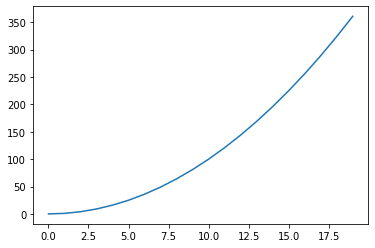

In [ ]:
plt.plot(np.arange(0,20),np.arange(0,20) **2)

In [ ]:
# -1 accting as wildcard for reshaping!
np.arange(0,100).reshape(-1,2)

array([[2, 3],
       [4, 5],
       [6, 7]])

In [ ]:
noten = np.arange(1,7)
np.where(noten<= 4,"bestanden","nicht bestanden")

array(['bestanden', 'bestanden', 'bestanden', 'bestanden',
       'nicht bestanden', 'nicht bestanden'], dtype='<U15')

# K-Fold Cross-Validation

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/hotels.csv")
kf = KFold(n_splits=3, shuffle=True)
scores = list()
last_index = []
for train_index, test_index in kf.split(df):
  print(train_index)
  print(test_index)
  hotelModel = LinearRegression()
  last_index = train_index
  #print(df[train_index,["Gewinn","Quadratmeter"]])
  #hotelModel.fit(df[train_index,["Gewinn","Quadratmeter"]],df[])

df.loc[last_index]


[  0   2   3   9  10  11  12  13  15  17  18  19  20  23  24  25  26  28
  30  31  34  35  37  38  39  41  43  44  46  47  48  49  50  51  53  54
  56  57  58  59  61  62  63  65  68  70  71  72  73  75  80  82  85  86
  87  88  89  90  91  92  94  95  96  97  99 100 101 102 104 105 109 110
 113 115 116 117 118 119 120 121 123 124 125 126 127 128 129 130 132 133
 134 135 136 137 138 139 143 144 145 147]
[  1   4   5   6   7   8  14  16  21  22  27  29  32  33  36  40  42  45
  52  55  60  64  66  67  69  74  76  77  78  79  81  83  84  93  98 103
 106 107 108 111 112 114 122 131 140 141 142 146 148 149]
[  0   1   2   3   4   5   6   7   8  11  12  14  15  16  17  19  21  22
  23  26  27  28  29  32  33  34  35  36  37  39  40  42  45  46  47  48
  50  51  52  54  55  57  59  60  64  66  67  68  69  70  71  72  73  74
  76  77  78  79  80  81  83  84  85  93  95  97  98 100 103 105 106 107
 108 110 111 112 114 116 119 121 122 123 124 125 126 127 129 131 132 137
 139 140 141 142 143 144

,Gewinn,Preis in Mio,Quadratmeter,Stadt
1,250000.0,27.95,3986.0,München
4,110000.0,23.76,3795.0,Berlin
5,246000.0,22.88,2773.0,München
6,54000.0,13.25,634.0,München
7,2000.0,8.94,82.0,München
...,...,...,...,...
142,8000.0,6.19,449.0,Köln
145,45000.0,10.50,1775.0,Köln
146,250000.0,23.80,4058.0,Köln
148,35000.0,15.80,2281.0,Berlin


## Kurzschreibweise

In [ ]:

np.mean(cross_val_score(LinearRegression(),df[["Gewinn","Quadratmeter"]],df[["Preis in Mio"]].values,cv = KFold(n_splits=10)))

KeyError: ignored

## Repeated K-Folds Cross Validation


*   Shuffle data
*   List item



In [ ]:

np.mean(cross_val_score(LinearRegression(),df[["Gewinn","Quadratmeter"]],df[["Preis in Mio"]].values,cv = RepeatedKFold(n_splits=10,n_repeats=20)))

0.7960498129642006

## Übung mit Diamanted

Vergleiche 2 Model
*   Preis <- Gewicht
*   Preis <- x,y,z



In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
np.mean(cross_val_score(LinearRegression(),df[["carat"]],df[["price"]],cv = KFold(n_splits=10,shuffle=True)))

0.8492715119333308

In [ ]:
np.mean(cross_val_score(LinearRegression(),df[["carat"]],df[["price"]],cv = RepeatedKFold(n_splits=10,n_repeats=100)))

0.849264287048349

In [ ]:
np.mean(cross_val_score(LinearRegression(),df[["x","y","z"]],df[["price"]],cv = RepeatedKFold(n_splits=10,n_repeats=100)))

0.7765824586873346

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 48.]),
 array([-476.59108093, -428.84483903, -381.09859712, -333.35235521,
        -285.6061133 , -237.85987139, -190.11362948, -142.36738757,
         -94.62114566,  -46.87490376,    0.87133815]),
 <a list of 10 Patch objects>)

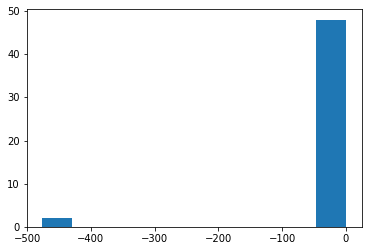

In [ ]:
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
polyFeatures.fit(df[["x","y","z"]])
scores = cross_val_score(LinearRegression(),polyFeatures.transform(df[["x","y","z"]]),df[["price"]],cv = RepeatedKFold(n_splits=5,n_repeats=10))
plt.hist(scores)

In [ ]:
# Taking media because mean is deceptible to outliers
np.median(scores)

0.8587898402618597

# Übungen zum Datensatz Salaries

Bzgl. Spalte Total pay


*   Durschnittsgehalt 2014 < 2013
*   Durschnittsgehalt 2013 < 2012
*   Durschnittsgehalt 2012 < 2013
*   Keine der oben genannten
*   media ?<>? mean
*   hist





In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/sf_salaries.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.loc[df["Year"]==2014,"TotalPay"].mean()<df.loc[df["Year"]==2013,"TotalPay"].mean()

True

In [ ]:
df.loc[df["Year"]==2013,"TotalPay"].mean()<df.loc[df["Year"]==2012,"TotalPay"].mean()

False

In [ ]:
df.loc[df["Year"]==2012,"TotalPay"].mean()<df.loc[df["Year"]==2011,"TotalPay"].mean()

False

In [ ]:
print("2014 mean:",df.loc[df["Year"]==2014,"TotalPay"].mean(), " median",df.loc[df["Year"]==2014,"TotalPay"].median())
print("2013 mean:",df.loc[df["Year"]==2013,"TotalPay"].mean(), " median",df.loc[df["Year"]==2013,"TotalPay"].median())
print("2012 mean:",df.loc[df["Year"]==2012,"TotalPay"].mean(), " median",df.loc[df["Year"]==2012,"TotalPay"].median())

2014 mean: 75463.91814023  median 72359.98
2013 mean: 77611.44314205405  median 74500.015
2012 mean: 74113.26226513737  median 70714.68


In [ ]:
df.groupby(by="Year").mean()

,Id,TotalPay,TotalPayBenefits,Notes
Year,,,,
2011,18080.0,71744.103871,71744.103871,NaN
2012,54542.5,74113.262265,100553.229232,NaN
2013,91728.5,77611.443142,101440.519714,NaN
2014,129593.0,75463.918140,100250.918884,NaN


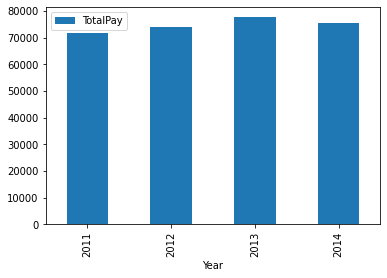

In [ ]:
df[["Year","TotalPay"]].groupby(by="Year").mean().plot(kind="bar")

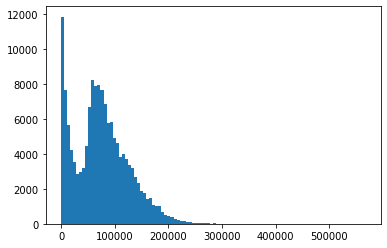

In [ ]:
plt.hist(df["TotalPay"], bins = 100)
plt.show()

In [ ]:
df["TotalPay"].mean()

74768.321971703

In [ ]:
df["TotalPay"].median()

71426.60999999999

In [ ]:
df.TotalPay.mean()

74768.321971703

# Logistische Regression

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/classification.csv")
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


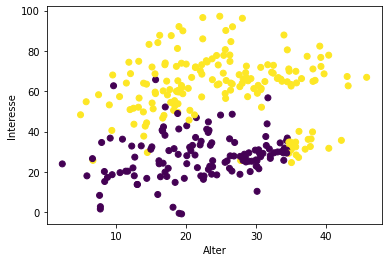

In [ ]:
plt.scatter(df.age,df.interest,c=df.success)
plt.xlabel("Alter")
plt.ylabel("Interesse")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["age","interest"]],df["success"], test_size=0.25)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(df[["age","interest"]])

In [ ]:
model = LogisticRegression()
model.fit(scaler.transform(X_train),y_train)
model.score(scaler.transform(X_test),y_test)


0.8933333333333333

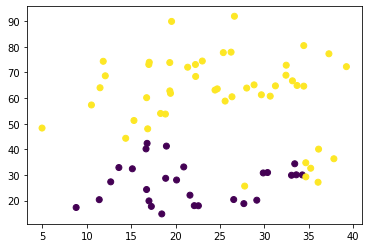

In [ ]:
plt.scatter(X_test.age,X_test.interest,c=y_test)

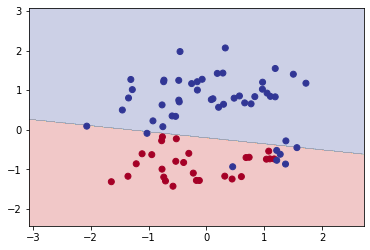

In [ ]:
plot_classifier(model,scaler.transform(X_test.values),y_test)

# Aufgabe Brustkrebs erkennen

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(df.drop(["id","diagnosis"],axis=1),df["diagnosis"],random_state=0, test_size= 0.25)

scaler.fit(X_train)

model = LogisticRegression()
model.fit(scaler.transform(X_train),y_train)
model.score(scaler.transform(X_test),y_test)

0.958041958041958

In [ ]:
df["diagnosis"]=="M"

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool

In [ ]:
scaler2 = StandardScaler()
scaler2.fit(df.drop(["id","diagnosis"],axis=1))
scores = cross_val_score(LogisticRegression(), scaler2.transform(df.drop(["id","diagnosis"],axis=1)),df[["diagnosis"]].values ,cv = RepeatedKFold(n_splits=10,n_repeats=100))


In [ ]:
np.mean(scores)

0.9787521929824561

(array([ 29.,   0.,  89.,   0.,   0., 226.,   0., 374.,   0., 282.]),
 array([0.92857143, 0.93571429, 0.94285714, 0.95      , 0.95714286,
        0.96428571, 0.97142857, 0.97857143, 0.98571429, 0.99285714,
        1.        ]),
 <a list of 10 Patch objects>)

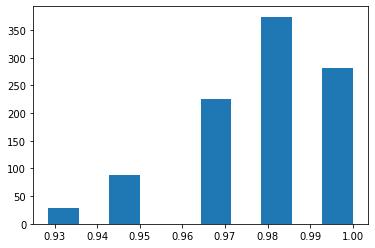

In [ ]:
plt.hist(scores,bins=10)

# Klassifikation

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/foods.csv")
df.head()

,product_name,brands,countries,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,clss
0,"Apple, Beetroot & Blackcurrant Juice",Marks & Spencer,"France,Royaume-Uni",188.0,0.1,10.5,10.1,0.4,Apple
1,Freezed Orange Juice with Mango and Apple,Marks & Spencer,"France,Royaume-Uni",237.0,0.4,11.5,10.4,0.9,Apple
2,Pressed British Apple Juice,"M&S,Marks & Spencer","France,Royaume-Uni",201.0,0.1,10.4,10.4,0.1,Apple
3,Juicy Juice Apple,Nestlé,United States,201.0,0.0,12.0,11.2,0.0,Apple
4,Apple Juice,"Tree Top, Tree Top Inc.",United States,209.0,0.0,12.1,10.8,0.0,Apple


## One vs. All

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(df.drop(["product_name","brands","countries","clss"],axis=1),df["clss"],random_state=42, test_size= 0.25)
scaler.fit(X_train)
model = LogisticRegression()
# This implementation will use One vs. all by default
model.fit(scaler.transform(X_train),y_train)
model.score(scaler.transform(X_test),y_test)

0.8791946308724832

## One vs. One

In [ ]:
model = OneVsRestClassifier(LogisticRegression()) #OneVsOneClassifier(LogisticRegression())
model.fit(scaler.transform(X_train),y_train)
model.score(scaler.transform(X_test),y_test)

0.87248322147651

In [ ]:
LogisticRegression?

In [ ]:
model = OneVsOneClassifier(LogisticRegression())
model.fit(scaler.transform(X_train),y_train)
model.score(scaler.transform(X_test),y_test)

0.8791946308724832

## Multinomial Logistic Regression

In [ ]:
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg")
model.fit(scaler.transform(X_train),y_train)
model.score(scaler.transform(X_test),y_test)

0.8791946308724832

# KNN

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/classification.csv")
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["success"],axis=1),df.success, test_size = 0.25)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
model = KNeighborsClassifier()
model.fit(scaler.transform(X_train),y_train)
model.score(scaler.transform(X_test),y_test)

0.9333333333333333

In [ ]:
plot_classifier(model, scaler.transform(X_train), y_train, proba = False, xlabel = "Alter", ylabel = "Interesse")

ValueError: ignored

## Iris Dataset

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/iris.csv")
df = df.drop(["Id"], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Species"],axis=1),df["Species"],test_size=0.25, random_state=0)
scaler2 = StandardScaler()
scaler2.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
modelLR = OneVsRestClassifier(LogisticRegression())
modelLR.fit(scaler2.transform(X_train),y_train)
modelLR.score(scaler2.transform(X_test),y_test)

0.8947368421052632

In [ ]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(scaler2.transform(X_train),y_train)
modelKNN.score(scaler2.transform(X_test),y_test)

0.9736842105263158

In [ ]:
scaler3 = StandardScaler()
scaler3.fit(df.drop(["Species"],axis=1))
scores2 = cross_val_score(KNeighborsClassifier(n_neighbors = 2), scaler3.transform(df.drop(["Species"],axis=1)),df[["Species"]] ,cv = RepeatedKFold(n_splits=10,n_repeats=100))
scores3 = cross_val_score(KNeighborsClassifier(n_neighbors = 3), scaler3.transform(df.drop(["Species"],axis=1)),df[["Species"]] ,cv = RepeatedKFold(n_splits=10,n_repeats=100))
scores4 = cross_val_score(KNeighborsClassifier(n_neighbors = 4), scaler3.transform(df.drop(["Species"],axis=1)),df[["Species"]] ,cv = RepeatedKFold(n_splits=10,n_repeats=100))
scores5 = cross_val_score(KNeighborsClassifier(n_neighbors = 5), scaler3.transform(df.drop(["Species"],axis=1)),df[["Species"]] ,cv = RepeatedKFold(n_splits=10,n_repeats=100))
scores7 = cross_val_score(KNeighborsClassifier(n_neighbors = 7), scaler3.transform(df.drop(["Species"],axis=1)),df[["Species"]] ,cv = RepeatedKFold(n_splits=10,n_repeats=100))
scores9 = cross_val_score(KNeighborsClassifier(n_neighbors = 9), scaler3.transform(df.drop(["Species"],axis=1)),df[["Species"]] ,cv = RepeatedKFold(n_splits=10,n_repeats=100))
scores11 = cross_val_score(KNeighborsClassifier(n_neighbors = 11), scaler3.transform(df.drop(["Species"],axis=1)),df[["Species"]] ,cv = RepeatedKFold(n_splits=10,n_repeats=100))

In [ ]:
print("K=2",np.mean(scores2),np.std(scores2),"\n K=3",np.mean(scores3),np.std(scores3),"\n K=4",np.mean(scores4),np.std(scores4),"\n K=5",np.mean(scores5),np.std(scores5),"\n K=7",np.mean(scores7),np.std(scores7),"\n K=9",np.mean(scores9),np.std(scores9))

K=2 0.9446666666666668 0.05708083936157755 
 K=3 0.9451333333333335 0.05520350230435262 
 K=4 0.9423333333333335 0.056520399463871045 
 K=5 0.9483333333333335 0.055552777708329844 
 K=7 0.9566000000000001 0.050736749775461346 
 K=9 0.9550666666666667 0.050408288560072685


In [ ]:
scores13 = cross_val_score(KNeighborsClassifier(n_neighbors = 13), scaler3.transform(df.drop(["Species"],axis=1)),df[["Species"]] ,cv = RepeatedKFold(n_splits=10,n_repeats=100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

# Decision Tree

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/mushrooms.csv")
d = {'e': True, 'p': False}
df["class"] = df["class"].map(d)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,True,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,True,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,False,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,True,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(df.drop(["class"], axis=1)),df["class"])
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, min_samples_leaf = 3)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9886755292959133

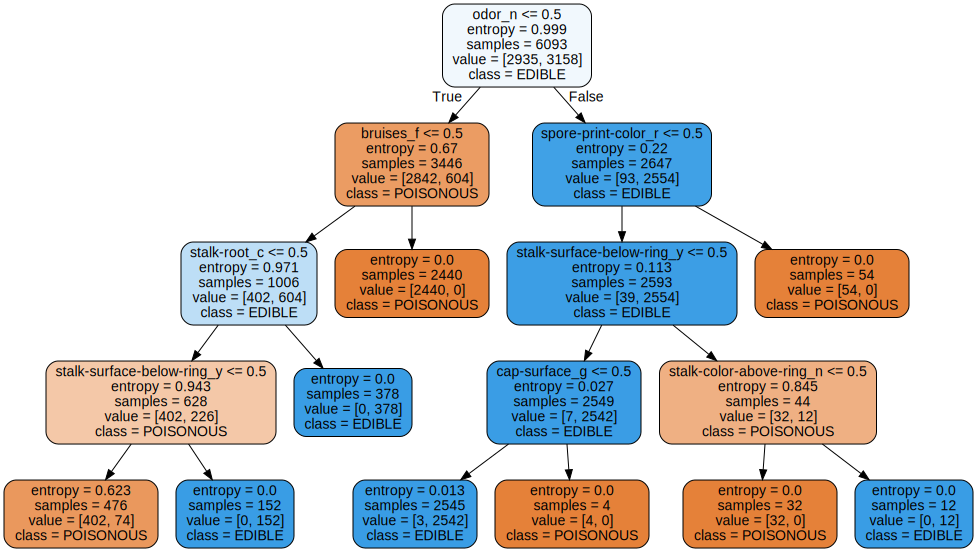

In [ ]:
tree = export_graphviz(model, None, 
                       feature_names = X_train.columns,
                       class_names = ["POISONOUS","EDIBLE"],
                       rounded = True,
                       filled = True)
#print(tree)
graphviz.Source(tree)

# Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)
model.score(X_test,y_test)

1.0

In [ ]:
RandomForestClassifier?

# Validation Curve

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [ ]:
param_range = np.array([40, 30, 20, 15, 10, 8, 7, 6, 5, 4, 3, 2, 1])

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), 
    df[["age", "interest"]],
    df["success"],
    param_name = "n_neighbors",
    param_range=param_range)


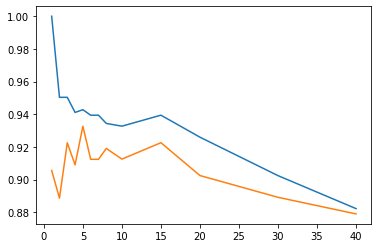

In [ ]:
plt.plot(param_range, np.mean(train_scores, axis=1))
plt.plot(param_range, np.mean(test_scores, axis=1))

(1.0, 9.0)

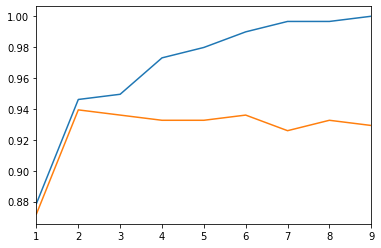

In [ ]:
param_range = np.arange(1,10) #np.array([40, 30, 20, 15, 10, 8, 7, 6, 5, 4, 3, 2, 1])

train_scores_depth, test_scores_depth = validation_curve(
    DecisionTreeClassifier(criterion = "entropy"), 
    df[["age", "interest"]],
    df["success"],
    param_name = "max_depth",
    param_range=param_range, cv=3)
plt.plot(param_range, np.mean(train_scores_depth, axis=1))
plt.plot(param_range, np.mean(test_scores_depth, axis=1))
plt.xlim(1,9)

#DecisionTreeClassifier(criterion = "entropy", max_depth = 4, min_samples_leaf = 3)

For max_dept  1


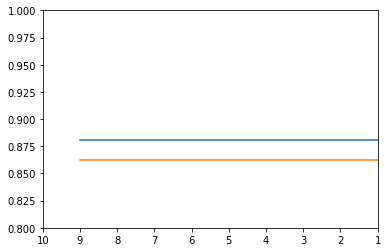

For max_dept  2


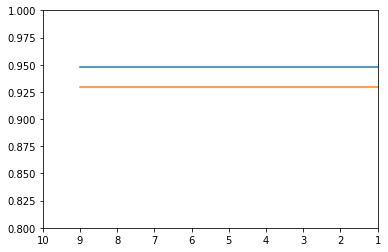

For max_dept  3


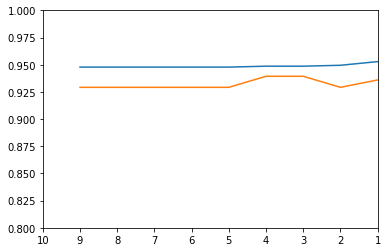

For max_dept  4


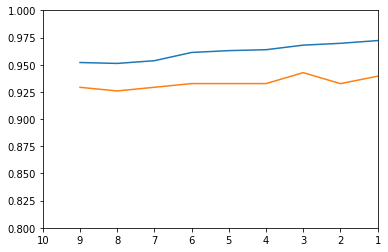

For max_dept  5


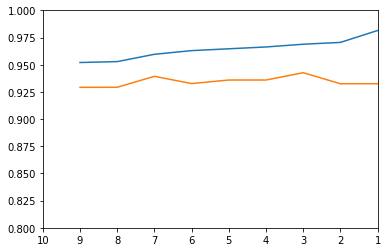

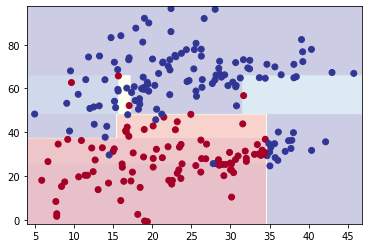

In [ ]:
param_range = np.arange(1,10) #np.array([40, 30, 20, 15, 10, 8, 7, 6, 5, 4, 3, 2, 1])

for i in range(1, 6):
  train_scores_depth, test_scores_depth = validation_curve(
    DecisionTreeClassifier(criterion = "entropy", max_depth = i), 
    df[["age", "interest"]],
    df["success"],
    param_name = "min_samples_leaf",
    param_range=param_range)
  print("For max_dept ",i)
  plt.figure()
  plt.plot(param_range, np.mean(train_scores_depth, axis=1))
  plt.plot(param_range, np.mean(test_scores_depth, axis=1))
  plt.ylim(0.8, 1)
  plt.xlim(10,1)
  plt.show()


X_train, X_test, y_train, y_test = train_test_split(df[["age", "interest"]].values,df["success"])
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, min_samples_leaf = 4)
model.fit(X_train,y_train)
plot_classifier(model,X_train,y_train,proba=True)

# Learning Curve
How well does our model work with less data

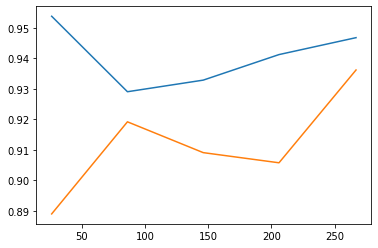

In [ ]:
train_sizes_abs, train_scores, test_scores = learning_curve(KNeighborsClassifier(),df[["age", "interest"]],df["success"], cv=10)
plt.plot(train_sizes_abs, np.mean(train_scores, axis =1))
plt.plot(train_sizes_abs, np.mean(test_scores, axis =1))

# Naive Bayes

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


0.8933333333333333


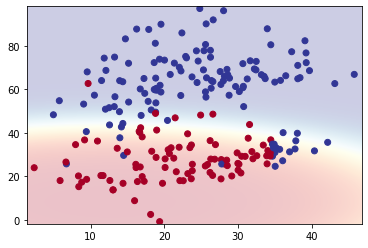

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["age", "interest"]].values, df["success"], random_state = 0, test_size = 0.25)
model = GaussianNB()
model.fit(X_train,y_train)
print(model.score(X_test, y_test))
plot_classifier(model,X_train,y_train,proba=True)

In [ ]:
y_train.shape

(75, 2)

## Spam Classifier

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/spam.csv")
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["message"], df["type"], random_state = 0)

cv = CountVectorizer(min_df = 0.001, max_df = 0.25)
cv.fit(X_train)

X_train = cv.transform(X_train)
X_test = cv.transform(X_test)
model = MultinomialNB()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9877961234745154

# Support Vector Mchines (SVM)

In [ ]:
df = pd.read_csv("drive/MyDrive/Udemy/classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["age", "interest"]].values, df["success"], random_state = 0, test_size = 0.25)
scaler = StandardScaler()
scaler.fit(X_train)
model = SVC(kernel="linear")
model.fit(scaler.transform(X_train),y_train)
model.score(scaler.transform(X_test),y_test)

0.88

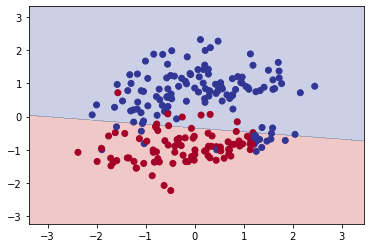

In [ ]:
plot_classifier(model, scaler.transform(X_train),y_train, proba=False)